In [12]:
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

In [13]:
from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))

train



In [14]:
TRAIN_1_DIR = '../data/train/1/'
TRAIN_0_DIR = '../data/train/0/'


ROWS = 36
COLS = 36
CHANNELS = 1

train_1 =   [TRAIN_1_DIR+i for i in os.listdir(TRAIN_1_DIR)]
train_0 =   [TRAIN_0_DIR+i for i in os.listdir(TRAIN_0_DIR)]

train_images = train_1 + train_0

print(len(train_images))
print(len(train_1))
print(len(train_0))

91720
64770
26950


In [15]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) #
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data(train_images)

print("Train shape: {}".format(train.shape))

Processed 0 of 91720
Processed 250 of 91720
Processed 500 of 91720
Processed 750 of 91720
Processed 1000 of 91720
Processed 1250 of 91720
Processed 1500 of 91720
Processed 1750 of 91720
Processed 2000 of 91720
Processed 2250 of 91720
Processed 2500 of 91720
Processed 2750 of 91720
Processed 3000 of 91720
Processed 3250 of 91720
Processed 3500 of 91720
Processed 3750 of 91720
Processed 4000 of 91720
Processed 4250 of 91720
Processed 4500 of 91720
Processed 4750 of 91720
Processed 5000 of 91720
Processed 5250 of 91720
Processed 5500 of 91720
Processed 5750 of 91720
Processed 6000 of 91720
Processed 6250 of 91720
Processed 6500 of 91720
Processed 6750 of 91720
Processed 7000 of 91720
Processed 7250 of 91720
Processed 7500 of 91720
Processed 7750 of 91720
Processed 8000 of 91720
Processed 8250 of 91720
Processed 8500 of 91720
Processed 8750 of 91720
Processed 9000 of 91720
Processed 9250 of 91720
Processed 9500 of 91720
Processed 9750 of 91720
Processed 10000 of 91720
Processed 10250 of 91

Processed 84500 of 91720
Processed 84750 of 91720
Processed 85000 of 91720
Processed 85250 of 91720
Processed 85500 of 91720
Processed 85750 of 91720
Processed 86000 of 91720
Processed 86250 of 91720
Processed 86500 of 91720
Processed 86750 of 91720
Processed 87000 of 91720
Processed 87250 of 91720
Processed 87500 of 91720
Processed 87750 of 91720
Processed 88000 of 91720
Processed 88250 of 91720
Processed 88500 of 91720
Processed 88750 of 91720
Processed 89000 of 91720
Processed 89250 of 91720
Processed 89500 of 91720
Processed 89750 of 91720
Processed 90000 of 91720
Processed 90250 of 91720
Processed 90500 of 91720
Processed 90750 of 91720
Processed 91000 of 91720
Processed 91250 of 91720
Processed 91500 of 91720
Train shape: (91720, 36, 36)


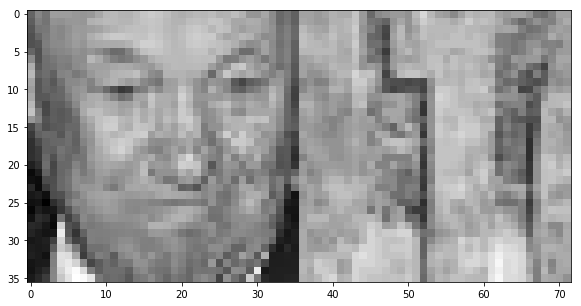

In [16]:
def show_example(idx):
    face = read_image(train_1[idx])
    noface = read_image(train_0[idx])
    pair = np.concatenate((face, noface), axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair, cmap='gray')
    plt.show()
    

show_example(1)

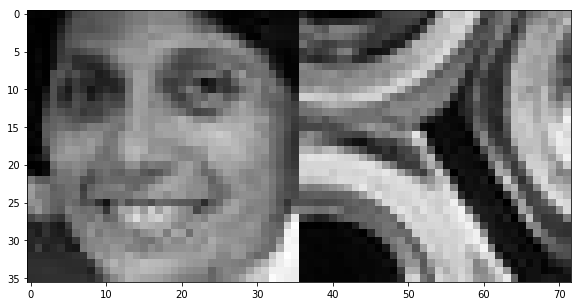

In [17]:
show_example(2)

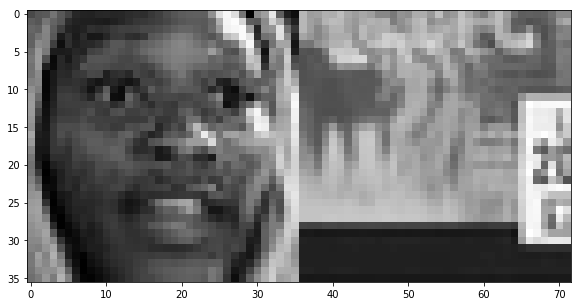

In [18]:
show_example(4)